In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from peakpy.optical import fit_gaussian as fg
import peakpy


In [2]:
peakpy.transformations.transformation_matrices.Rzyx

AttributeError: module 'peakpy' has no attribute 'transformations'

In [1]:
imgs_path_pre = "/home/thedos/prosastra/PeakSat/scripts/codes/optical-organizational/astral-peaksat/01_skg_previbe"
imgs_path_post = "/home/thedos/prosastra/PeakSat/scripts/codes/optical-organizational/astral-peaksat/02_skg_postvibe"
for_gif_path = "/home/thedos/prosastra/PeakSat/scripts/codes/optical-organizational/skg_alignment/for_gif"
xroi, yroi = 520, 750
xcm, ycm = 732, 968
xc, yc = 804.1, 918.1

In [4]:

img_list_pre = [x for x in os.listdir(imgs_path_pre) if x[-4:] == '.npy']
img_list_pre.sort()

img_list_post = [x for x in os.listdir(imgs_path_post) if x[-4:] == '.npy']
img_list_post.sort()

<Figure size 640x480 with 0 Axes>

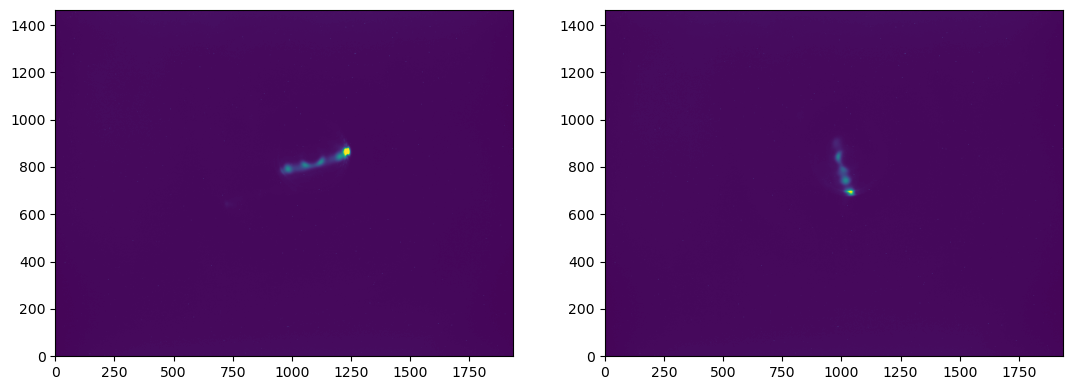

In [11]:
img_test = np.load(os.path.join(imgs_path_pre, img_list_pre[0]))
img_test0 = np.load('/home/thedos/prosastra/PeakSat/scripts/codes/optical-organizational/astral-peaksat/02_skg_postvibe_extra/20251011-163855.npy')
img_test1 = np.load('/home/thedos/prosastra/PeakSat/scripts/codes/optical-organizational/astral-peaksat/02_skg_postvibe_extra/20251011-164305.npy')
plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (13, 6))
ax[0].imshow(img_test0, origin='lower')
ax[1].imshow(img_test1, origin='lower')








In [ ]:
## calculate postvibe result

pres = []
final_image_pre = np.zeros((400, 400))
for img_pp in img_list_pre:
    img = np.load(os.path.join(imgs_path_pre, img_pp))
    if img.shape[0] == 1464:
        img = img[520:920,750:1150]
    print(img.shape)
    popt, _ = fg.fit2DGaussian_scipy(img)
    pres.append(list(popt))
    # pil_img = Image.fromarray(img)
    # pil_img.save(os.path.join(for_gif_path, img_pp.split('.')[0]+'.png'))
    final_image_pre += img



## calculate post result

posts = []
final_image_post = np.zeros((400, 400))
for img_pp in img_list_post:
    img = np.load(os.path.join(imgs_path_post, img_pp))
    if img.shape[0] == 1464:
        img = img[520:920,750:1150]
    print(img.shape)
    popt, _ = fg.fit2DGaussian_scipy(img)
    posts.append(list(popt))
    # pil_img = Image.fromarray(img)
    # pil_img.save(os.path.join(for_gif_path, img_pp.split('.')[0]+'.png'))
    final_image_post += img
    if popt[0] < 200:
        print(img_pp)

(400, 400)
Center of the centroid: (249.09170689558968, 234.02649870886975, 12.576345659953862, 14.542354614555842)
Covariances: [0.00636306 0.00735775 0.00638654 0.00738491]
(400, 400)
Center of the centroid: (243.47936399588212, 231.88156838589, 12.903860411071012, 10.853136704518816)
Covariances: [0.00929818 0.00782053 0.00932428 0.00784249]
(400, 400)
Center of the centroid: (230.12805294106315, 234.7596985908513, 8.567316723131619, 14.75557894229794)
Covariances: [0.00647013 0.01114364 0.00648649 0.01117183]
(400, 400)
Center of the centroid: (250.16032821747214, 230.66979404708215, 9.988838411034289, 13.571394372449783)
Covariances: [0.00794669 0.01079682 0.00796828 0.01082614]
(400, 400)
Center of the centroid: (258.78439126382926, 245.53569910663853, 9.18554781770751, 13.474683920470662)
Covariances: [0.00636297 0.00933422 0.00637872 0.00935732]
(400, 400)
Center of the centroid: (255.11137107167318, 245.16256014264923, 11.884797538699873, 11.602318799760818)
Covariances: [0.00

calculate the result from 1 fit

In [41]:
popt_pre, pcov_pre = fg.fit2DGaussian_scipy(final_image_pre)
popt_post, pcov_post = fg.fit2DGaussian_scipy(final_image_post)

Center of the centroid: (247.00730838153558, 235.61217358469398, 14.42612775032125, 17.182269919947814)
Covariances: [0.01075344 0.01280799 0.01080776 0.01287269]
Center of the centroid: (250.1330357016805, 239.1182110268977, 17.76009120775986, 17.614214573126922)
Covariances: [0.01116736 0.0110758  0.01123927 0.01114712]


- The total Resolution is (1464, 1936)
- The laser divergence (at 1/e^2) is approx: 4'
- The expected center is at: 732, 968
- The fitted center is at (520 + 247, 750 + 235) = (767, 985) +- (14, 17) 
- The centroid sigma, (15px) can translate to 1/e^2 diameter of 4σ, aka 60px, or  4.5', which is consistent with the beam divergence. 
- This difference in pixels is: (35, 17) = 39. Assuming a 4.5'' pixel scale, this will translate to approx 3' or 0.05 degrees, which off centered with an almost 3σ CI. 
- Note, that this is well 3.5-7'' (1-2 mrad) tolerance we got from AL. 
- Note also, that after the vibration, we will measure the change in the detected position. 


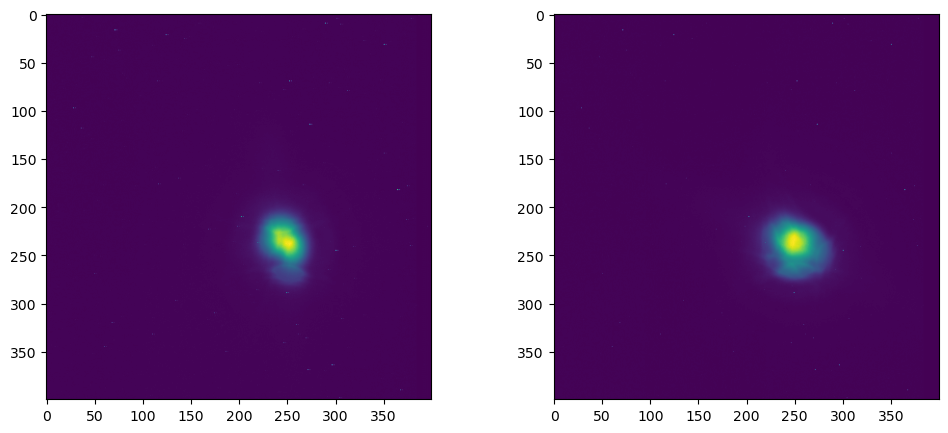

In [42]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].imshow(final_image_pre)
axs[1].imshow(final_image_post)


## calculate the result from individual fits

In [43]:
pres = np.array(pres)
xx_pre = pres[:, 0]
yy_pre = pres[:, 1]
sxx_pre = pres[:, 2]
syy_pre = pres[:, 3]

posts = np.array(posts)
xx_post = posts[:, 0]
yy_post = posts[:, 1]
sxx_post = posts[:, 2]
syy_post = posts[:, 3]

In [44]:
dd_pre = np.sqrt((xx_pre-xc)**2+(yy_pre-yc)**2)
dd_post = np.sqrt((xx_post-xc)**2+(yy_post-yc)**2)

In [51]:
print(dd_pre)
print(dd_post)

[881.10698555 886.32586314 892.67552423 883.03335796 866.06162161
 868.67941696 852.91420071 885.14387261 876.13966765 897.4722966
 878.01571562 889.46644179]
[891.21654819 891.14025928 880.2738223  887.13775904 867.69521736
 893.00403036 855.64643255 870.44785171 854.53193242 863.21968302
 877.60181504 872.32356701 872.37914531 896.51393694 882.00675465
 868.51141435 868.74954419 847.95617679 877.8960701  880.14634829
 875.99436192]


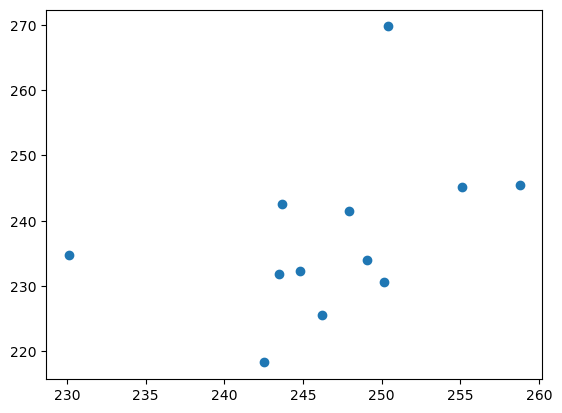

In [45]:
plt.figure()
plt.scatter(xx_pre, yy_pre)

In [ ]:
sxxavg_pre = np.sqrt(np.sum(sxx_pre**2))/np.sqrt(len(sxx_pre))
syyavg_pre = np.sqrt(np.sum(syy_pre**2))/np.sqrt(len(syy_pre))
xxavg_pre = np.mean(xx_pre)

yyavg_pre = np.mean(yy_pre)

print('-----previbe results----------')

print(xxavg_pre)
print(yyavg_pre)
print(sxxavg_pre)
print(syyavg_pre)



print('-----postvibe results----------')

sxxavg_post = np.sqrt(np.sum(sxx_post**2))/np.sqrt(len(sxx_post))
syyavg_post = np.sqrt(np.sum(syy_post**2))/np.sqrt(len(syy_post))
xxavg_post = np.mean(xx_post)

yyavg_post = np.mean(yy_post)

print(xxavg_post)
print(yyavg_post)
print(sxxavg_post)
print(syyavg_post)


-----previbe results----------
246.85475242662588
237.6605414622247
11.859313063797712
11.990354849443868
-----postvibe results----------
250.2836721776564
241.0769300492637
12.686671093275189
11.69825779526496


In [ ]:
# Open the image
image = Image.open("input.png")

# Define crop area (left, upper, right, lower)
# Example: crop a rectangle starting at (100, 100) up to (400, 400)
crop_area = (100, 100, 400, 400)

# Crop the image
cropped_image = image.crop(crop_area)

# Save the cropped image as PNG
cropped_image.save("output.png")

print("Cropped image saved as output.png")

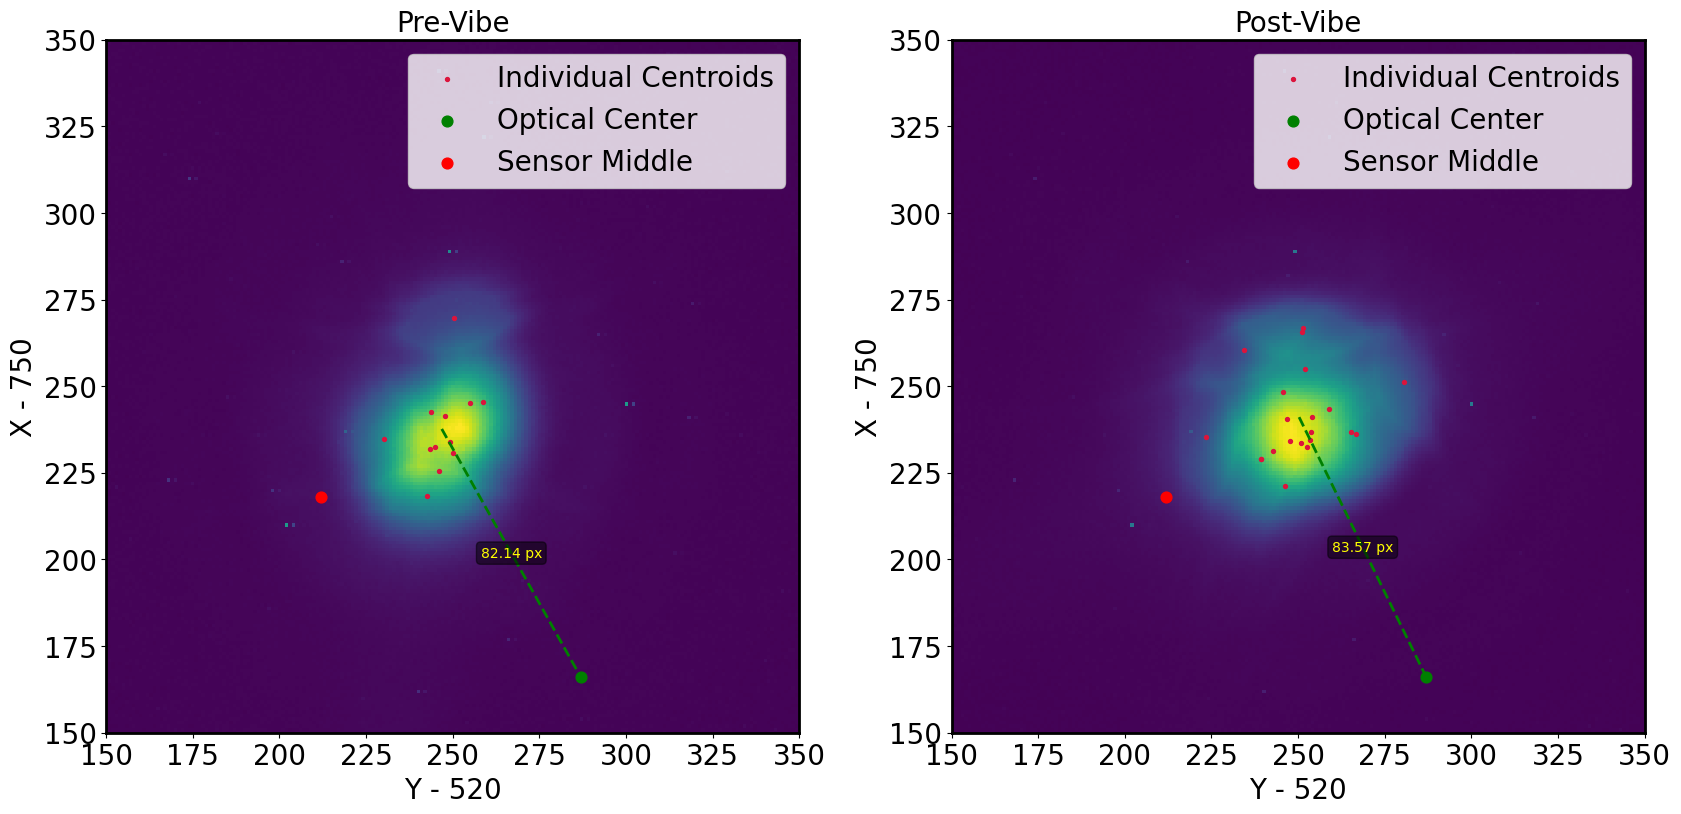

In [93]:
with plt.rc_context({'axes.labelsize': 20 , 'axes.linewidth': 2, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'legend.fontsize': 20, 'axes.titlesize': 20}):

    fig, axs = plt.subplots(1, 2, figsize = (20, 9))
    axs[0].imshow(final_image_pre)
    axs[1].imshow(final_image_post)
    axs[0].scatter(xx_pre, yy_pre, color = 'crimson', s = 8, label = 'Individual Centroids')
    axs[1].scatter(xx_post, yy_post, color = 'crimson', s = 8, label = 'Individual Centroids')

    axs[0].scatter(xc-xroi, yc - yroi, color = 'green', label = 'Optical Center', s = 60)
    axs[0].scatter(xcm-xroi, ycm - yroi, color = 'red', label = 'Sensor Middle', s = 60)

    axs[1].scatter(xc-xroi, yc - yroi, color = 'green', label = 'Optical Center', s = 60)
    axs[1].scatter(xcm-xroi, ycm - yroi, color = 'red',label = 'Sensor Middle', s = 60)

    axs[0].set_title('Pre-Vibe')

    axs[1].set_title('Post-Vibe')

    axs[0].set(xlabel = 'Y - 520', ylabel = 'X - 750')
    axs[1].set(xlabel = 'Y - 520', ylabel = 'X - 750')



    distance_pre = np.hypot(xxavg_pre - xc + xroi, yyavg_pre - yc + yroi)
    mid_xpre = (xxavg_pre + xc - xroi) / 2 
    mid_ypre = (yyavg_pre + yc - yroi) / 2 
    axs[0].plot([xxavg_pre, xc-xroi], [yyavg_pre, yc-yroi], 'g--', linewidth=2)


    # Annotate with distance at the midpoint
    axs[0].text(mid_xpre, mid_ypre, f"{distance_pre:.2f} px", color='yellow',
            fontsize=10, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))
    

    distance_post = np.hypot(xxavg_post - xc + xroi, yyavg_post - yc + yroi)
    mid_xpost = (xxavg_post + xc - xroi) / 2 
    mid_ypost = (yyavg_post + yc - yroi) / 2 
    axs[1].plot([xxavg_post, xc-xroi], [yyavg_post, yc-yroi], 'g--', linewidth=2)


    # Annotate with distance at the midpoint
    axs[1].text(mid_xpost, mid_ypost, f"{distance_post:.2f} px", color='yellow',
            fontsize=10, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3'))

    axs[0].legend()

    axs[1].legend()


    axs[0].set_xlim(150, 350)
    axs[0].set_ylim(150, 350)

    axs[1].set_xlim(150, 350)
    axs[1].set_ylim(150, 350)

In [81]:
[xx_pre-xroi, xc-xroi], [yy_pre-yroi, yc-yroi]

([array([-270.9082931 , -276.520636  , -289.87194706, -269.83967178,
         -261.21560874, -264.88862893, -269.61555831, -275.19562603,
         -272.06667903, -277.48507441, -276.31888386, -273.81636363]),
  287],
 [array([-515.97350129, -518.11843161, -515.24030141, -519.33020595,
         -504.46430089, -504.83743986, -480.25208242, -517.67810648,
         -508.58518041, -531.71994664, -507.48602952, -524.38797596]),
  166])